In [7]:
!pip install config

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scst
import scipy.optimize as scop
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
png = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pinguins.csv')
png.fillna(value=0, inplace=True)
print(png)
# png_1 = pd.DataFrame(png)
# print(png_1)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             0.0            0.0                0.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [29]:
#men is 0, woman is 1
png['sex'] = png['sex'].replace({'male': 0 , 'female': 1})
png.drop('species', axis= 1 , inplace= True )
png.drop('island', axis=1, inplace=True )

In [30]:
png

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,39.1,18.7,181.0,3750.0,0,2007
1,39.5,17.4,186.0,3800.0,1,2007
2,40.3,18.0,195.0,3250.0,1,2007
3,0.0,0.0,0.0,0.0,0,2007
4,36.7,19.3,193.0,3450.0,1,2007
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,2009
340,43.5,18.1,202.0,3400.0,1,2009
341,49.6,18.2,193.0,3775.0,0,2009
342,50.8,19.0,210.0,4100.0,0,2009


In [31]:
# png.to_csv('penguins.csv', index = False) вы можете запустить данный код, чтобы скачать файл с пингвинами

In [73]:
peng = pd.read_csv('/content/penguins.csv')
peng

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,39.1,18.7,181.0,3750.0,0,2007
1,39.5,17.4,186.0,3800.0,1,2007
2,40.3,18.0,195.0,3250.0,1,2007
3,0.0,0.0,0.0,0.0,0,2007
4,36.7,19.3,193.0,3450.0,1,2007
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,2009
340,43.5,18.1,202.0,3400.0,1,2009
341,49.6,18.2,193.0,3775.0,0,2009
342,50.8,19.0,210.0,4100.0,0,2009


In [74]:
read = '/content/penguins.csv'

<ipython-input-75-62cdbcc249a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='sex', y = 'body_mass_g' , data=peng , palette = 'pink')


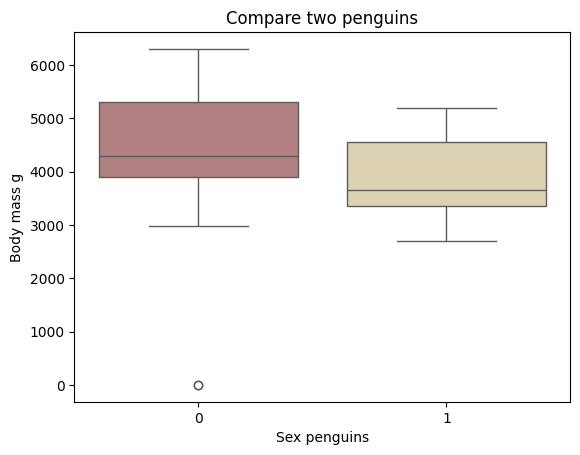

In [75]:
# Построим график и заметим, что девочки весят меньше мальчиков
X = peng['sex']
Y = peng['body_mass_g']

sns.boxplot(x ='sex', y = 'body_mass_g' , data=peng , palette = 'pink')

plt.xlabel('Sex penguins')
plt.ylabel('Body mass g')
plt.title('Compare two penguins')
plt.show()

### Проверим данные на нормальность распределения по тесту Шапиро-Уилка, если значения отклоняются от 0,5 в меньшую сторону, то надо проверять на ненормальность распределения

In [76]:
with open(read, 'r' ) as INPUT:
  header = INPUT.readline().strip().split(',')
  data = [np.array([], dtype=float) for i in header]
  for Rows in INPUT:
    Rows = Rows.strip().split(',')
    for i in range(len(Rows)):
      data[i] = np.append(data[i], float(Rows[i]))

### Логорифмируем данные, чтобы сделать данные более симметричнми

In [77]:
data[1] = np.log(data[1])
data[2] = np.log(data[2])
print("/n bill_length_mm: ", data[1])
print('/n bill_depth_mm: ', data[2] )

/n bill_length_mm:  [2.92852352 2.85647021 2.89037176       -inf 2.9601051  3.02529108
 2.87919846 2.97552957 2.89591194 3.0056826  2.83907846 2.8507065
 2.8678989  3.05400118 3.04927304 2.87919846 2.94443898 3.0301337
 2.91235066 3.06805294 2.90690106 2.92852352 2.95491028 2.89591194
 2.84490938 2.93916192 2.92316158 2.88480071 2.92316158 2.93916192
 2.81540872 2.89591194 2.87919846 2.93916192 2.83321334 3.04927304
 2.99573227 2.91777073 2.9601051  2.94968834 2.89037176 2.91235066
 2.91777073 2.98061864 2.82731362 2.93385687 2.94443898 2.93916192
 2.88480071 3.05400118 2.87356464 2.93916192 2.88480071 2.97041447
 2.89591194 2.92316158 2.86220088 2.93385687 2.8094027  2.94968834
 2.82731362 3.04927304 2.83321334 2.90142159 2.83907846 2.89037176
 2.78501124 2.94968834 2.8094027  2.96527307 2.94443898 2.91235066
 2.84490938 2.93916192 2.86220088 2.91777073 2.82137889 2.96527307
 2.77881927 2.94968834 2.84490938 2.8678989  2.93385687 2.96527307
 2.87919846 3.01062089 2.97041447 2.92316158

<ipython-input-77-69cb3bf84a5d>:1: RuntimeWarning: divide by zero encountered in log
  data[1] = np.log(data[1])
<ipython-input-77-69cb3bf84a5d>:2: RuntimeWarning: divide by zero encountered in log
  data[2] = np.log(data[2])


In [84]:
def Normality_checker(List_of_values, alpha=0.05):
    n = len(List_of_values)
    Checker_vector = []
    for i in range(n):
        if 1-scst.shapiro(List_of_values[1]).statistic < alpha:
            Checker_vector.append(True)
        else:
            Checker_vector.append(False)
    return Checker_vector

In [83]:
print(header)
print(Normality_checker(data, alpha=0.13))


['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
[False, False, False, False, False, False]


In [71]:
def Mean_square_func(V_variavle, V_fixed):
    N = len(V_variavle) if len(V_variavle) == len(V_fixed) else 0
    try:
        S_square = np.sum(np.power(np.abs(V_variavle- V_fixed),2)) / (N-1)
    except ZeroDivisionError:
        if N == "0":
            raise("Mean_square_func - must have arg with equal lens!")
        else:
            raise("Mean_square_func - arg must be great then 1!")
    else:
        return S_square


In [53]:
# with open(read , 'r') as INPUT:
#   for String in INPUT:
#     String_split = String.strip().split(',')
#     try:
#       String_split = [float(i) for i in String_split]
#     except ValueError:
#       continue
#     else:
#       val_1.append(String_split[2])
#       val_2.append(String_split[3])

In [54]:
val_1 = np.array(val_1)
val_2 = np.array(val_2)
val_1_log = np.log(val_1)
val_2_log = np.log(val_2)


print('Нормальность распределения по Шапиро Уилка: ', Normality_checker([val_1_log, val_2_log]))

Нормальность распределения по Шапиро Уилка:  [False, False]


<ipython-input-54-f1f42e80a69b>:3: RuntimeWarning: divide by zero encountered in log
  val_1_log = np.log(val_1)
<ipython-input-54-f1f42e80a69b>:4: RuntimeWarning: divide by zero encountered in log
  val_2_log = np.log(val_2)


In [ ]:
def Linear_regression_one_demetion(X_values, Pars):
  N = len(X_values)
  if len(Pars) == 2:
    return np.ones(N)*Pars[0]+Pars[1]*X_values
  else:
    raise('*With Pars troubles! *')

In [ ]:
Target_func = lambda Pars: Mean_square_func(Linear_regression_one_demetion(val_1, Pars), val_2) #summ

Pars_init = [2, 3]

res = scop.minimize(Target_func, Pars_init, method='SLSQP', options={'eps': 1e-5, 'ftol': 1e-5, 'disp': True, 'maxiter': 90})

val_2_fitted = Linear_regression_one_demetion(val_1, res.x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 55.197962312427336
            Iterations: 5
            Function evaluations: 19
            Gradient evaluations: 5
